Hello! Let's explore some US bikeshare data!
Hi, lets start the analysis please enter one of the following cities to start:
 - chicago
 - new york city
 - washington
Kindly note this program accepts variants like ['chicago', 'CHICAGO', or 'cHicAgo']

Los Angeles
Error
Please select one city of the highlighted cities!

Hi, lets start the analysis please enter one of the following cities to start:
 - chicago
 - new york city
 - washington
Kindly note this program accepts variants like ['chicago', 'CHICAGO', or 'cHicAgo']

cHicAgo
You have select chicago!

Hi, lets start the analysis please enter month name or 'All' to select all months:
-All, -January, -February, -March, -April, -May, -June
Kindly note this program accepts variants like ['JunE', 'june','JUNE']

june
You have select month number June!

Hi, lets start the analysis please enter days names or 'All' to select all days:
-All, -Saturday, -Sunday, -Monday, -Tuesday -Wednesday, -Thursday, -Friday
Kindly note this program accepts 

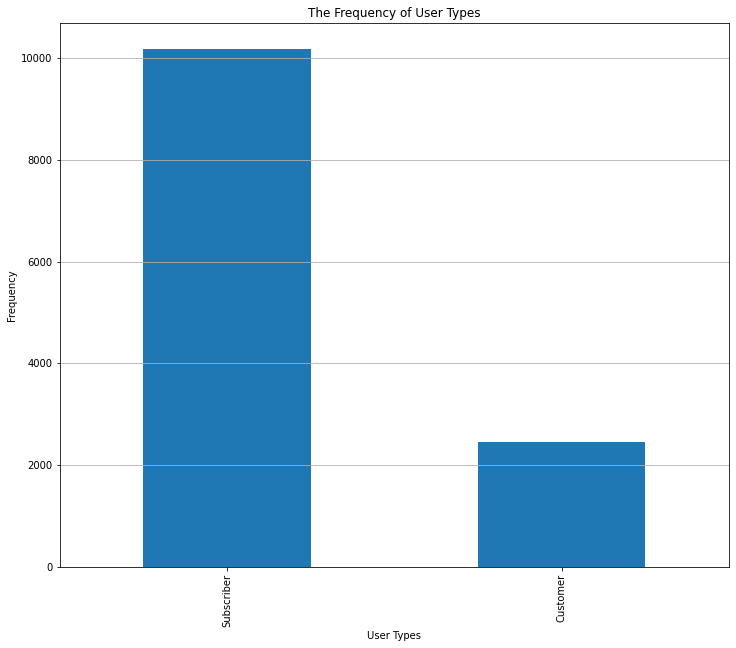

Display counts of gender:
Male      7641
Female    2550
Name: Gender, dtype: int64

Display the earliest year of birth:
1918

Display the most recent year of birth:
2003

Display the most common year of birth:
1989


This took 0.0818476676940918 seconds.
----------------------------------------

Would you like to restart? Enter yes or no.
no


In [12]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }

#this function to take the inputs of the user and validate if these values are correctly selected or not. 
#Before starting with the analysis.
def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.

    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    print('Hello! Let\'s explore some US bikeshare data!')
    # TO DO: get user input for city (chicago, new york city, washington). 
    # HINT: Use a while loop to handle invalid inputs
    
    #creating the while loop for the cities first, the next list highlight the data related to specific cities.
    city = ['chicago', 'new york city', 'washington']
    #creating the while loop:
    while True:
        print(f"Hi, lets start the analysis please enter one of the following cities to start:\n - chicago\n - new york city\n - washington")
        print(f"Kindly note this program accepts variants like ['chicago', 'CHICAGO', or 'cHicAgo']\n")
        city_input = str(input().lower())
        if city_input in city:
            #do sth
            print(f"You have select {city_input}!\n")
            break
        else: # incase the user entered incorrect value or even a value not among the highlighted list.
            print("Error")
            print("Please select one city of the highlighted cities!\n")
            
    # next list is the months list, includes "all" value to highlight the data with no filter to certain month.        
    month = ['All','January','February','March','April','May','June']
    while True:
        print(f"Hi, lets start the analysis please enter month name or 'All' to select all months:")
        print(f"-All, -January, -February, -March, -April, -May, -June")
        print(f"Kindly note this program accepts variants like ['JunE', 'june','JUNE']\n")
        month_input = str(input().title())
        if month_input in month:
            #do sth
            print(f"You have select month number {month_input}!\n")
            break
        else:
            print("Error")
            print("Please select one city of the highlighted cities!\n")
            
    # day_of_week as in the problem 3, it helps me to build and iterate over these values.        
    day_of_week = ['All','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    while True:
        print(f"Hi, lets start the analysis please enter days names or 'All' to select all days:")
        print(f"-All, -Saturday, -Sunday, -Monday, -Tuesday -Wednesday, -Thursday, -Friday")
        print(f"Kindly note this program accepts variants like ['MonDAY', 'monday', 'MONDAY']\n")
        day_of_week_input = str(input().title())
        if day_of_week_input in day_of_week:
            #do sth
            print(f"You have select day {day_of_week_input}!\n")
            break
         #in case the user entered invalid value, I've created the values one more time from the internal list so 
         # the user can pick the correct ones
        else:
            print("Error")
            print(f"Please select weekday\n-All, -Saturday, -Sunday, -Monday, -Tuesday, -Wednesday, -Thursday, -Friday\n")
            print("Please select one of the highlighted days!\n")

    
    print('-'*40)
    return city_input, month_input, day_of_week_input

# the next function is pretty similar from the exercise I did in Problem 1,2,3 where I start navigating the data
# and check the true key features of the analysis.
def load_data(city_input, month_input, day_of_week_input):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """

    # load data file into a dataframe
    df = pd.read_csv(CITY_DATA[city_input])
    
    # convert the Start Time column to datetime
    df['Start Time'] = pd.to_datetime(df['Start Time'])
    
    # extract month and day of week from Start Time to create new columns
    df['month'] = pd.to_datetime(df['Start Time']).dt.month
    df['day_of_week'] = pd.to_datetime(df['Start Time']).dt.day_name()
    
    # filter by month if applicable
    if month_input != 'All':
        # use the index of the months list to get the corresponding int
        months = ['January', 'February', 'March', 'April', 'May', 'June']
        month_input = months.index(month_input) + 1
    
        # filter by month to create the new dataframe
        df = df[df['month'] == month_input]
        
    # filter by day of week if applicable
    if day_of_week_input != 'All':
        # filter by day of week to create the new dataframe
        df = df[df['day_of_week'] == day_of_week_input.title()]
        

    return df


def time_stats(df):
    """Displays statistics on the most frequent times of travel."""

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()

    # TO DO: display the most common month
    popular_month = df['month'].mode()[0]
    print(f"The most common month is: {popular_month}\n")
    
    # TO DO: display the most common day of week
    popular_day = df['day_of_week'].mode()[0]
    print(f"The most common day of the week is: {popular_day}\n")

    # TO DO: display the most common start hour
    popular_start_hour = pd.to_datetime(df['Start Time']).dt.hour.mode()[0]
    print(f"The most common start hour is: {popular_start_hour}\n")

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    # TO DO: display most commonly used start station
    popular_start_station = df['Start Station'].mode()[0]
    print(f"The most common start station is: {popular_start_station}\n")

    # TO DO: display most commonly used end station
    popular_end_station = df["End Station"].mode()[0]
    print(f"The most common end station is: {popular_end_station}\n")

    # TO DO: display most frequent combination of start station and end station trip
    popular_combination = "From " + (df['Start Station'] + " To " + df["End Station"]).mode()[0]
    print(f"The most combination of start station and end station trip is: {popular_combination}\n")
    
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def trip_duration_stats(df):
    """Displays statistics on the total and average trip duration."""

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()
    
    # Example usage:
    # TO DO: display total travel time
    total_travel_time = round(df['Trip Duration'].sum(),2)
    print(f"Display total travel time:")
    
    # TO DO: display mean travel time
    mean_travel_time = round(df['Trip Duration'].mean(),2)
    
    # Transform the time into hours, minutes, and seconds and this function iterate over the time value...
    def convert_seconds_to_hours(N):
        # Calculate years
        hours = N // 3600
        remaining = N % 3600
    
        # Calculate months
        minutes = remaining // 60
        seconds = round(remaining % 60,0)
        
        # Print the results
        print(f"{hours} hours") # to display how many hours
        print(f"{minutes} minutes") # to display how many minutes
        print(f"{seconds} seconds\n") # to display how many seconds approximately!
    N = total_travel_time
    convert_seconds_to_hours(total_travel_time)
    
    N = mean_travel_time
    print(f"\nDisplay mean travel time:")
    convert_seconds_to_hours(mean_travel_time)
    

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def user_stats(df):
    """Displays statistics on bikeshare users."""

    print('\nCalculating User Stats...\n')
    start_time = time.time()

    # TO DO: Display counts of user types
    count_user_types = df['User Type'].value_counts()
    print(f"Display counts of user types:\n{count_user_types}\n")
    
    ### Creating a simple bar plot...
    def bar_plot():
        plt.figure(figsize=(12,10))
        df['User Type'].value_counts().plot.bar()
        plt.title(f"The Frequency of User Types")
        plt.xlabel(f"User Types")
        plt.ylabel(f"Frequency")
        plt.grid(axis='y')
        plt.show()
        
    bar_plot()
    
    # washington dataset doesn't have the "Gender" variable so in this case we built a try function..
    try:
        # TO DO: Display counts of gender
        count_gender = df['Gender'].value_counts()
        print(f"Display counts of gender:\n{count_gender}\n")
        # washington dataset doesn't have "Gender" so you need to create an option!
    except:
        print(f"\nThere is no Gender info for this city!\n")
    
    try:
        # TO DO: Display earliest, most recent, and most common year of birth
        earliest_year = df['Birth Year'].min().astype(int)
        most_recent_year = df['Birth Year'].max().astype(int)
        most_common_year = df['Birth Year'].mode()[0].astype(int)
    
        print(f"Display the earliest year of birth:\n{earliest_year}\n")
        print(f"Display the most recent year of birth:\n{most_recent_year}\n")
        print(f"Display the most common year of birth:\n{most_common_year}\n")
    except:
        print(f"\nThere is no Birth Year info for this city!\n")
    
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)



def main(): 
    while True:
        city_input, month_input, day_of_week_input = get_filters()
        df = load_data(city_input, month_input, day_of_week_input)

        time_stats(df)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)

        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break


if __name__ == "__main__":
	main()
